In [1]:
!pip install sqlalchemy

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2
import json
from sqlalchemy import create_engine

In [3]:
def rds_python_conn(sql):

    # rds와 python 연동을 위한 정보 입력
    with open('postgres.info.json','r') as json_file:
        db_info = json.load(json_file)

    host = db_info.get('host')
    dbname = 'postgres' 
    user = 'postgres' 
    password = db_info.get('password')
    port = 5432

    connection = psycopg2.connect(host=host,
                                  dbname=dbname ,
                                  user=user ,
                                  password=password ,
                                  port=port)

    cur = connection.cursor()

    cur.execute(sql)
    connection.commit()

In [4]:
# 데이터베이스 연결 설정
conn = psycopg2.connect(database="postgres", user="postgres", password="postgres123", host="postgres.c4brhfvhrm5g.ap-northeast-2.rds.amazonaws.com", port=5432)

# 쿼리 실행 후 결과를 pandas dataframe으로 변환
query = "SELECT * FROM \"order\""
df_order = pd.read_sql(query, conn)

query = "SELECT * FROM \"order_items\""
df_order_items = pd.read_sql(query, conn)

query = "SELECT * FROM \"payments\""
df_payments = pd.read_sql(query, conn)

query = "SELECT * FROM \"products\""
df_products = pd.read_sql(query, conn)

query = "SELECT * FROM \"sellers\""
df_sellers = pd.read_sql(query, conn)

query = "SELECT * FROM \"mql\""
df_mql = pd.read_sql(query, conn)

query = "SELECT * FROM \"customers\""
df_customers = pd.read_sql(query, conn)

query = "SELECT * FROM \"closed_deals\""
df_closed_deals = pd.read_sql(query, conn)

# 연결 종료
conn.close()

C:\Users\mj985\AppData\Local\Temp\ipykernel_924\382263397.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_order = pd.read_sql(query, conn)
C:\Users\mj985\AppData\Local\Temp\ipykernel_924\382263397.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_order_items = pd.read_sql(query, conn)
C:\Users\mj985\AppData\Local\Temp\ipykernel_924\382263397.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_payments = pd.read_sql(query, conn)
C:\Users\mj985\AppData\Local\Temp\ipykernel_924\382263397.py:15: UserWarning: pan

In [5]:
display(df_order.info(),df_order.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  int64         
 1   customer_id                    99441 non-null  int64         
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), int64(2), object(1)
memory usage: 6.1+ MB


None

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,13974,65773,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,83165,13301,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,66104,44559,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,64037,69256,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,14183,35294,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [6]:
df_order['order_status'].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [7]:
display(df_order_items.info(),df_order_items.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  int64         
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  int64         
 3   seller_id            112650 non-null  int64         
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 6.0 MB


None

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,96870,1,12130,2622,2017-09-19 09:45:35,58.90,13.29
1,9433,1,29611,1942,2017-05-03 11:05:13,239.90,19.93
2,87326,1,23255,1180,2018-01-18 14:48:30,199.00,17.87
3,91182,1,1404,620,2018-08-15 10:10:18,12.99,12.79
4,79789,1,30255,2293,2017-02-13 13:57:51,199.90,18.14


In [8]:
df_order_items['total'] = df_order_items['price'] + df_order_items['freight_value']

In [9]:
display(df_payments.info(),df_payments.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  int64  
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 4.0+ MB


None

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,93586,1,credit_card,8,99.33
1,2955,1,credit_card,1,24.39
2,82474,1,credit_card,1,65.71
3,55775,1,credit_card,8,107.78
4,4054,1,credit_card,2,128.45


In [10]:
df_order['order_id'].nunique()

99441

In [11]:
df_payments['order_id'].nunique()

99440

In [12]:
df_sales = pd.merge(df_order, df_payments, on="order_id", how="left")

In [13]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103887 entries, 0 to 103886
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       103887 non-null  int64         
 1   customer_id                    103887 non-null  int64         
 2   order_status                   103887 non-null  object        
 3   order_purchase_timestamp       103887 non-null  datetime64[ns]
 4   order_approved_at              103712 non-null  datetime64[ns]
 5   order_delivered_carrier_date   101999 non-null  datetime64[ns]
 6   order_delivered_customer_date  100755 non-null  datetime64[ns]
 7   order_estimated_delivery_date  103887 non-null  datetime64[ns]
 8   payment_sequential             103886 non-null  float64       
 9   payment_type                   103886 non-null  object        
 10  payment_installments           103886 non-null  float64       
 11  

In [14]:
df_sales.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,13974,65773,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,credit_card,1.0,18.12
1,13974,65773,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3.0,voucher,1.0,2.00
2,13974,65773,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.0,voucher,1.0,18.59
3,83165,13301,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,boleto,1.0,141.46
4,66104,44559,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,credit_card,3.0,179.12


In [15]:
print(df_order['order_status'].value_counts(),df_sales['order_status'].value_counts())

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64 order_status
delivered      100757
shipped          1166
canceled          664
unavailable       649
invoiced          325
processing        319
created             5
approved            2
Name: count, dtype: int64


In [16]:
# df_sales.drop_duplicates(subset="order_id", inplace=True)

In [17]:
print(df_order['order_status'].value_counts(),df_sales['order_status'].value_counts())

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64 order_status
delivered      100757
shipped          1166
canceled          664
unavailable       649
invoiced          325
processing        319
created             5
approved            2
Name: count, dtype: int64


In [18]:
# df_sales에서 order_status가 'delivered', 'shipped', 'invoiced', 'processing'인 데이터 추출
order_status = ["delivered", "shipped", "invoiced", "processing"]
df = df_sales[df_sales["order_status"].isin(order_status)]

# 월별 매출 합계 계산
monthly_sales = df.groupby(pd.Grouper(key="order_purchase_timestamp", freq="M"))["payment_value"].sum()

# 결과 출력
print(monthly_sales)

order_purchase_timestamp
2016-09-30        136.23
2016-10-31      51657.53
2016-11-30          0.00
2016-12-31         19.62
2017-01-31     137006.76
2017-02-28     283560.32
2017-03-31     425656.40
2017-04-30     405808.92
2017-05-31     582926.16
2017-06-30     499827.47
2017-07-31     578858.58
2017-08-31     662071.77
2017-09-30     717195.22
2017-10-31     764785.28
2017-11-30    1172355.54
2017-12-31     861647.65
2018-01-31    1102639.41
2018-02-28     979828.63
2018-03-31    1152736.74
2018-04-30    1156303.91
2018-05-31    1145748.63
2018-06-30    1020494.29
2018-07-31    1039880.16
2018-08-31     996896.15
2018-09-30        166.46
Freq: M, Name: payment_value, dtype: float64


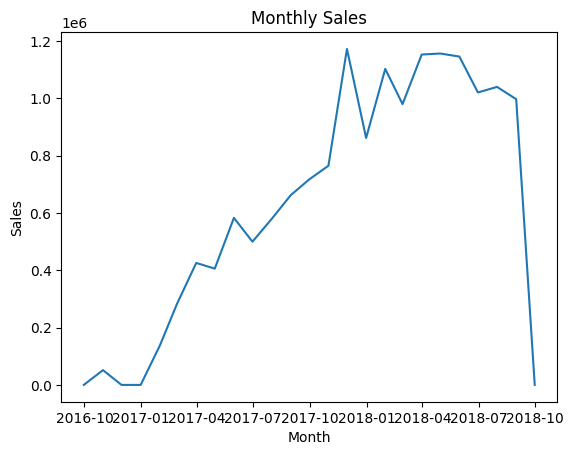

In [19]:
# 그래프 그리기
plt.plot(monthly_sales.index, monthly_sales.values)
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Monthly Sales")
plt.show()

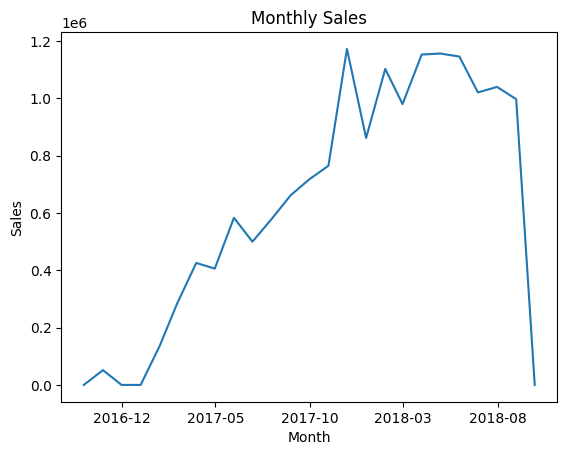

In [20]:
import matplotlib.dates as mdates

# 그래프 그리기
fig, ax = plt.subplots()
ax.plot(monthly_sales.index, monthly_sales.values)
ax.set_xlabel("Month")
ax.set_ylabel("Sales")
ax.set_title("Monthly Sales")

# x축 간격 설정
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=5))

plt.show()

order_purchase_timestamp
2016-09-30    136.230000
2016-10-31    166.101383
2016-11-30           NaN
2016-12-31     19.620000
2017-01-31    163.883684
2017-02-28    155.802374
2017-03-31    153.611115
2017-04-30    159.641589
2017-05-31    150.122627
2017-06-30    147.311368
2017-07-31    137.040384
2017-08-31    148.015151
2017-09-30    161.167465
2017-10-31    160.365964
2017-11-30    151.506273
2017-12-31    147.618237
2018-01-31    147.470832
2018-02-28    143.145161
2018-03-31    154.356821
2018-04-30    160.843498
2018-05-31    161.646251
2018-06-30    159.527011
2018-07-31    161.321775
2018-08-31    150.907682
2018-09-30    166.460000
Freq: M, Name: payment_value, dtype: float64


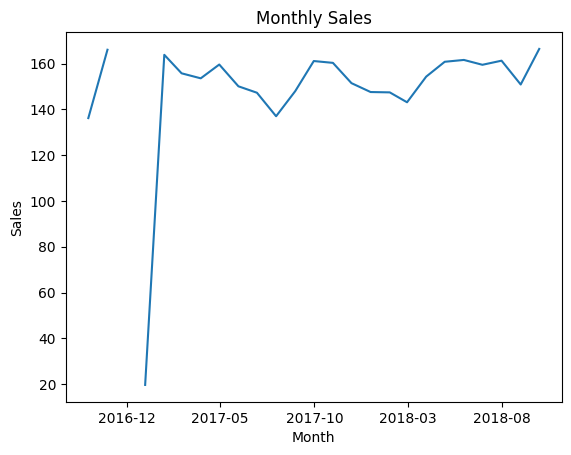

In [21]:
# df_sales에서 order_status가 'delivered', 'shipped', 'invoiced', 'processing'인 데이터 추출
order_status = ["delivered", "shipped", "invoiced", "processing"]
df = df_sales[df_sales["order_status"].isin(order_status)]

# 월별 매출 합계 계산
monthly_sales = df.groupby(pd.Grouper(key="order_purchase_timestamp", freq="M"))["payment_value"].mean()

# 결과 출력
print(monthly_sales)

# 그래프 그리기
fig, ax = plt.subplots()
ax.plot(monthly_sales.index, monthly_sales.values)
ax.set_xlabel("Month")
ax.set_ylabel("Sales")
ax.set_title("Monthly Sales")

# x축 간격 설정
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=5))

plt.show()


In [22]:
df_mql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   mql_id              8000 non-null   int64         
 1   first_contact_date  8000 non-null   datetime64[ns]
 2   landing_page_id     8000 non-null   int64         
 3   origin              8000 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 250.1+ KB


In [23]:
df_closed_deals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   mql_id                    842 non-null    int64         
 1   seller_id                 842 non-null    int64         
 2   sdr_id                    842 non-null    int64         
 3   sr_id                     842 non-null    int64         
 4   won_date                  842 non-null    datetime64[ns]
 5   business_segment          842 non-null    object        
 6   lead_type                 842 non-null    object        
 7   lead_behaviour_profile    842 non-null    object        
 8   business_type             842 non-null    object        
 9   declared_monthly_revenue  842 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 65.9+ KB


In [24]:
check = pd.merge(df_mql, df_closed_deals, on = 'mql_id', how = 'inner')

In [25]:
check

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,business_type,declared_monthly_revenue
0,3690,2018-02-21,119,organic_search,2187,17,2,2018-02-26 19:58:54,pet,online_medium,cat,reseller,0.0
1,6059,2018-04-04,39,referral,648,6,3,2018-05-08 20:17:59,car_accessories,industry,eagle,reseller,0.0
2,1076,2018-04-03,417,organic_search,3397,0,9,2018-06-05 17:27:23,home_appliances,online_big,cat,reseller,0.0
3,221,2018-01-14,196,paid_search,1900,2,3,2018-01-17 13:51:03,food_drink,online_small,unknown,reseller,0.0
4,1265,2017-10-09,432,unknown,3242,15,3,2018-07-03 20:17:45,home_appliances,industry,wolf,manufacturer,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,598,2018-03-28,95,organic_search,2629,22,17,2018-08-01 20:22:31,home_decor,offline,cat,reseller,0.0
838,1527,2018-05-18,382,organic_search,1235,27,13,2018-09-27 18:58:41,construction_tools_house_garden,online_big,wolf,reseller,200000.0
839,7113,2018-05-25,358,paid_search,3301,27,17,2018-06-06 20:15:26,computers,online_medium,wolf,reseller,0.0
840,5228,2018-02-04,490,social,1289,19,3,2018-03-06 15:52:23,pet,online_beginner,cat,reseller,0.0


### 재구매 관련 조사

In [26]:
import numpy as np

In [27]:
df_customers['order_count'] = df_customers.groupby('customer_unique_id')['customer_id'].transform('count')
df_customers['customer_type'] = np.where(df_customers['order_count'] == 1, '0', '1')

In [28]:
check_re = df_customers[df_customers['customer_type']=='1']
check_no = df_customers[df_customers['customer_type']=='0']

In [29]:
check_re

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_count,customer_type
5,1911,35886,89254,jaragua do sul,SC,2,1
8,87023,93995,81560,curitiba,PR,2,1
13,22828,35246,5704,sao paulo,SP,2,1
32,48351,12200,42800,camacari,BA,2,1
33,94156,23164,27525,resende,RJ,2,1
...,...,...,...,...,...,...,...
99324,48147,80016,31565,belo horizonte,MG,2,1
99327,10527,45334,38050,uberaba,MG,2,1
99336,28315,59552,9530,sao caetano do sul,SP,2,1
99353,35480,78884,29134,viana,ES,2,1


In [30]:
check_re = pd.merge(check_re, df_order, on = 'customer_id', how= 'left')
check_no = pd.merge(check_no, df_order, on = 'customer_id', how= 'left')
check_re.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6342 entries, 0 to 6341
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    6342 non-null   int64         
 1   customer_unique_id             6342 non-null   int64         
 2   customer_zip_code_prefix       6342 non-null   int64         
 3   customer_city                  6342 non-null   object        
 4   customer_state                 6342 non-null   object        
 5   order_count                    6342 non-null   int64         
 6   customer_type                  6342 non-null   object        
 7   order_id                       6342 non-null   int64         
 8   order_status                   6342 non-null   object        
 9   order_purchase_timestamp       6342 non-null   datetime64[ns]
 10  order_approved_at              6278 non-null   datetime64[ns]
 11  order_delivered_c

In [31]:
check_re = pd.merge(check_re, df_payments, on = 'order_id', how= 'left')
check_no = pd.merge(check_no, df_payments, on = 'order_id', how= 'left')
check_re.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6723 entries, 0 to 6722
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    6723 non-null   int64         
 1   customer_unique_id             6723 non-null   int64         
 2   customer_zip_code_prefix       6723 non-null   int64         
 3   customer_city                  6723 non-null   object        
 4   customer_state                 6723 non-null   object        
 5   order_count                    6723 non-null   int64         
 6   customer_type                  6723 non-null   object        
 7   order_id                       6723 non-null   int64         
 8   order_status                   6723 non-null   object        
 9   order_purchase_timestamp       6723 non-null   datetime64[ns]
 10  order_approved_at              6651 non-null   datetime64[ns]
 11  order_delivered_c

In [32]:
# check_re 데이터프레임
check_re_payment_type_counts = check_re['payment_type'].value_counts()
check_re_payment_installments_counts = check_re['payment_installments'].value_counts()
check_re_payment_sequential_counts = check_re['payment_sequential'].value_counts()

# check_no 데이터프레임
check_no_payment_type_counts = check_no['payment_type'].value_counts()
check_no_payment_installments_counts = check_no['payment_installments'].value_counts()
check_no_payment_sequential_counts = check_no['payment_sequential'].value_counts()

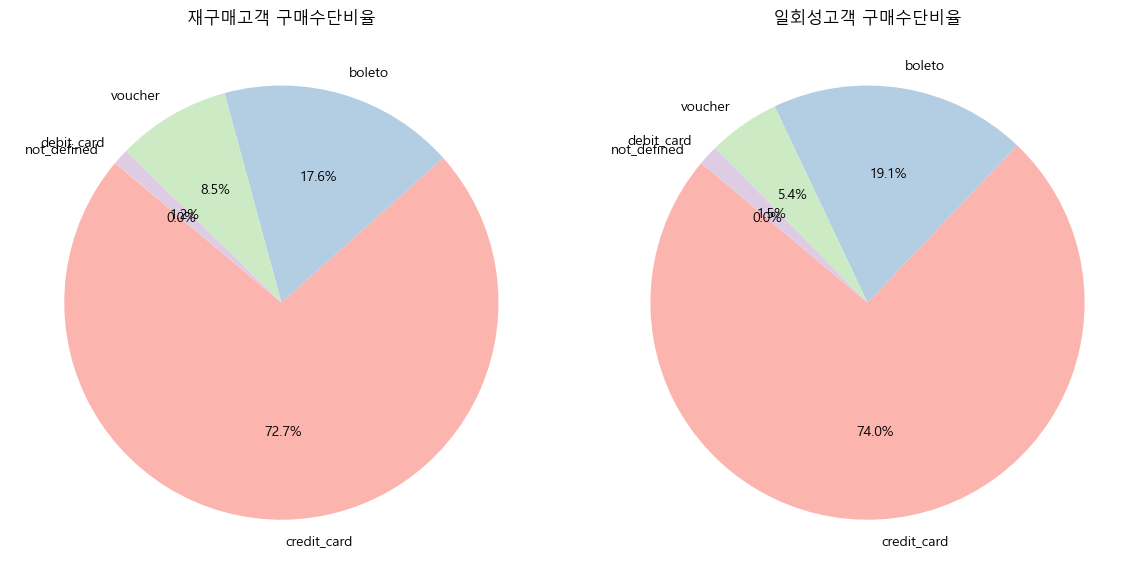

In [33]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# check_re 데이터프레임의 payment_type 값 별 개수
check_re_payment_type_counts = check_re['payment_type'].value_counts()

# check_no 데이터프레임의 payment_type 값 별 개수
check_no_payment_type_counts = check_no['payment_type'].value_counts()

# 세 번째로 큰 아이템을 찾기 위해 아이템들을 개수에 따라 정렬
sorted_items_re = check_re_payment_type_counts.index[np.argsort(-check_re_payment_type_counts.values)]
sorted_items_no = check_no_payment_type_counts.index[np.argsort(-check_no_payment_type_counts.values)]

# 파스텔 톤 색상 지정
pastel_colors = ['#fbb4ae', '#b3cde3', '#ccebc5', '#decbe4', '#fed9a6']

# 파이 차트 그리기
plt.figure(figsize=(12, 6))

# 첫 번째 파이 차트 (check_re)
plt.subplot(1, 2, 1)
plt.pie(check_re_payment_type_counts, labels=sorted_items_re, autopct='%1.1f%%', startangle=140, colors=pastel_colors)
plt.title('재구매고객 구매수단비율')

# 두 번째 파이 차트 (check_no)
plt.subplot(1, 2, 2)
plt.pie(check_no_payment_type_counts, labels=sorted_items_no, autopct='%1.1f%%', startangle=140, colors=pastel_colors)
plt.title('일회성고객 구매수단비율')

plt.tight_layout(pad=2)  # 텍스트 겹침을 줄이기 위한 여백 조정
plt.show()

ValueError: 'label' must be of length 'x'

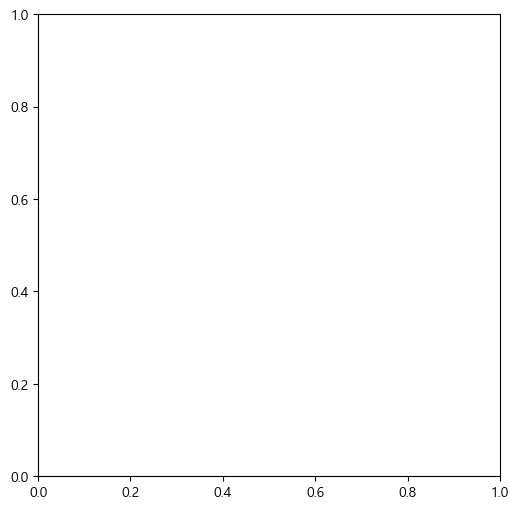

In [34]:
import matplotlib.pyplot as plt

# check_re 데이터프레임의 payment_type 값 별 개수
check_re_payment_type_counts = check_re['payment_type'].value_counts()

# check_no 데이터프레임의 payment_type 값 별 개수
check_no_payment_type_counts = check_no['payment_type'].value_counts()

# 세 번째로 큰 아이템을 찾기 위해 아이템들을 개수에 따라 정렬
sorted_items = check_re_payment_type_counts.index[np.argsort(-check_re_payment_type_counts.values)]

# 'not_defined'와 'debit_card' 항목을 합치기 위해 새로운 데이터 생성
combined_counts = check_re_payment_type_counts.copy()
combined_counts['debit_card'] += combined_counts['not_defined']
combined_counts = combined_counts.drop('not_defined')

# 파이 차트 그리기
plt.figure(figsize=(6, 6))
plt.pie(combined_counts, labels=sorted_items, autopct='%1.1f%%', startangle=140)
plt.title('check_re Payment Type Ratio')

plt.tight_layout()
plt.show()

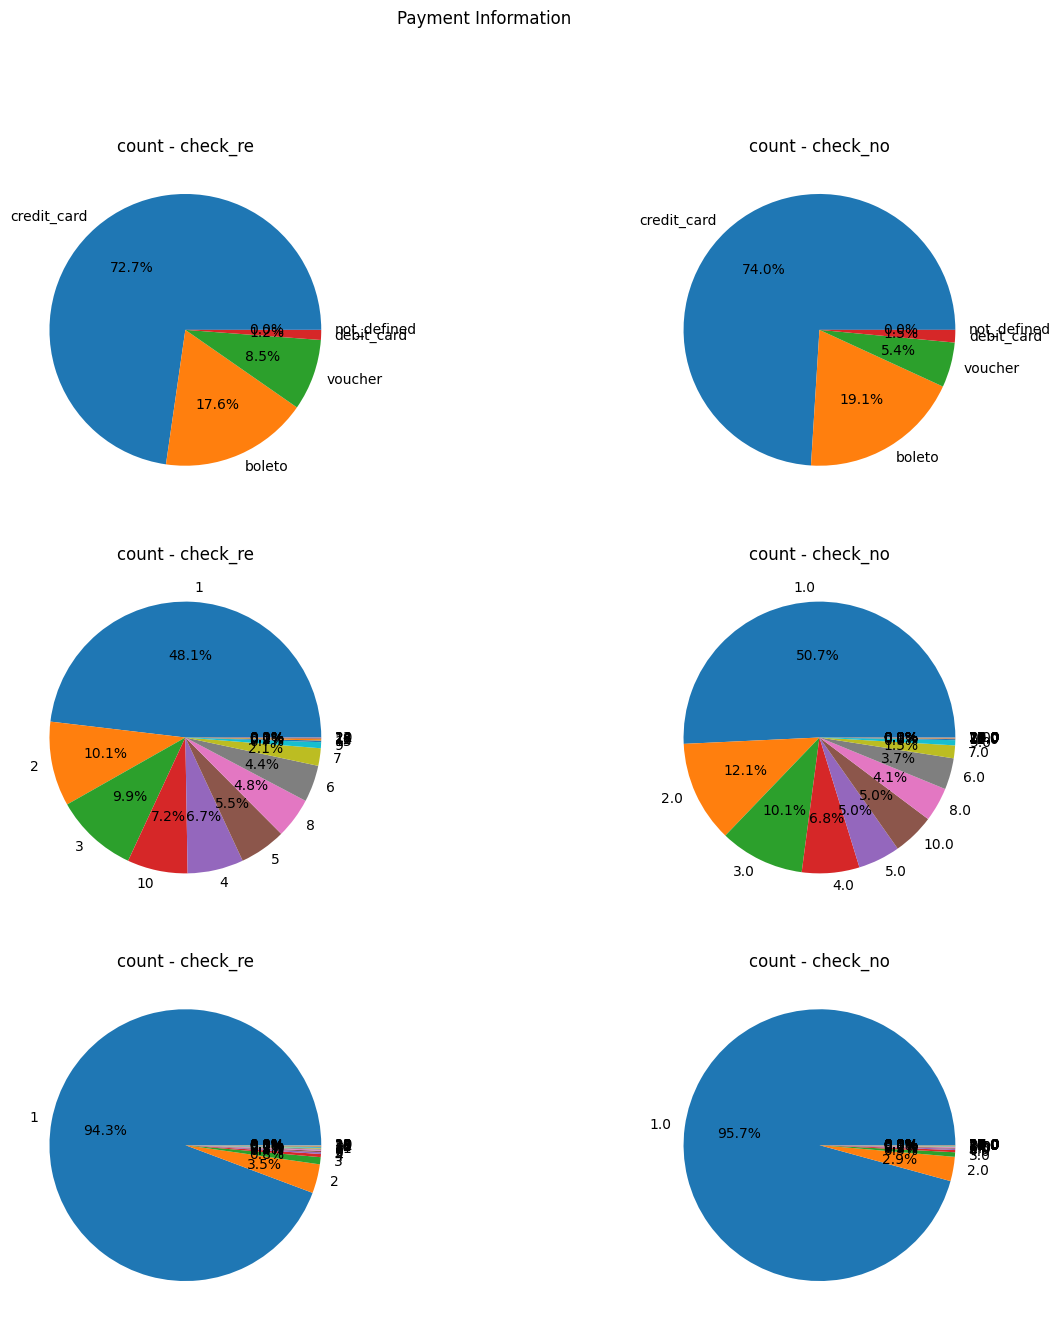

In [ ]:
# 카운트를 담을 리스트를 생성합니다.
counts_list = [
    [check_re_payment_type_counts, check_no_payment_type_counts],
    [check_re_payment_installments_counts, check_no_payment_installments_counts],
    [check_re_payment_sequential_counts, check_no_payment_sequential_counts]
]

# 차트의 크기와 제목을 지정합니다.
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Payment Information')

# 각각의 차트를 그립니다.
for i in range(len(counts_list)):
    axs[i][0].pie(counts_list[i][0], labels=counts_list[i][0].index, autopct='%1.1f%%')
    axs[i][0].set_title(counts_list[i][0].name + ' - check_re')
    
    axs[i][1].pie(counts_list[i][1], labels=counts_list[i][1].index, autopct='%1.1f%%')
    axs[i][1].set_title(counts_list[i][1].name + ' - check_no')

# 차트를 출력합니다.
plt.show()

### 주문부터 배송완료까지 시간


In [35]:
# 주문 ~ 배송완료
display(check_no.head(5), check_re.head(5))

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_count,customer_type,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,93596,86343,14409,franca,SP,1,0,46039,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,credit_card,2.0,146.87
1,96387,55527,9790,sao bernardo do campo,SP,1,0,84308,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1.0,credit_card,8.0,335.48
2,71593,44820,1151,sao paulo,SP,1,0,5207,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,credit_card,7.0,157.73
3,17589,36016,8775,mogi das cruzes,SP,1,0,71820,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0,credit_card,1.0,173.30
4,46972,96049,13056,campinas,SP,1,0,62601,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1.0,credit_card,8.0,252.25


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_count,customer_type,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,1911,35886,89254,jaragua do sul,SC,2,1,72972,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,2017-09-28 17:32:43,2017-10-04,1,debit_card,1,282.21
1,87023,93995,81560,curitiba,PR,2,1,12263,delivered,2018-01-18 12:35:44,2018-01-18 12:56:32,2018-01-18 23:25:35,2018-01-26 15:17:57,2018-02-20,1,debit_card,1,39.10
2,22828,35246,5704,sao paulo,SP,2,1,60892,delivered,2018-03-07 15:57:14,2018-03-07 16:15:30,2018-03-12 23:02:49,2018-03-15 00:46:30,2018-03-19,1,credit_card,3,36.39
3,48351,12200,42800,camacari,BA,2,1,33721,delivered,2018-04-18 09:42:53,2018-04-18 09:55:17,2018-04-20 18:52:39,2018-05-17 20:19:49,2018-05-18,1,credit_card,1,67.05
4,94156,23164,27525,resende,RJ,2,1,27255,delivered,2017-06-14 18:31:54,2017-06-15 18:43:04,2017-06-22 08:11:38,2017-07-07 20:32:47,2017-07-07,1,credit_card,8,134.25


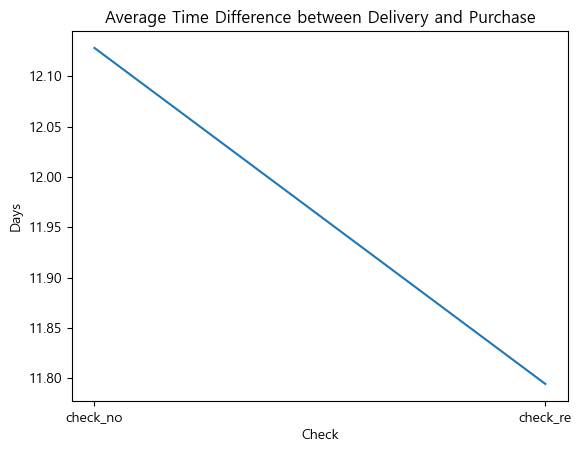

In [36]:
check_no['time_diff'] = (check_no['order_delivered_customer_date'] - check_no['order_purchase_timestamp']).dt.days
check_re['time_diff'] = (check_re['order_delivered_customer_date'] - check_re['order_purchase_timestamp']).dt.days

# 평균 계산
no_mean = check_no['time_diff'].mean()
re_mean = check_re['time_diff'].mean()

# 그래프 그리기
plt.plot(['check_no', 'check_re'], [no_mean, re_mean])
plt.title('Average Time Difference between Delivery and Purchase')
plt.xlabel('Check')
plt.ylabel('Days')
plt.show()

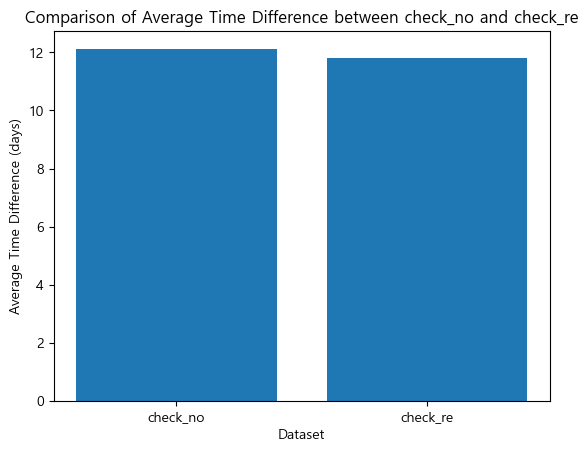

In [37]:
# 바차트로 비교
plt.bar(['check_no', 'check_re'], [no_mean, re_mean])
plt.title('Comparison of Average Time Difference between check_no and check_re')
plt.xlabel('Dataset')
plt.ylabel('Average Time Difference (days)')
plt.show()

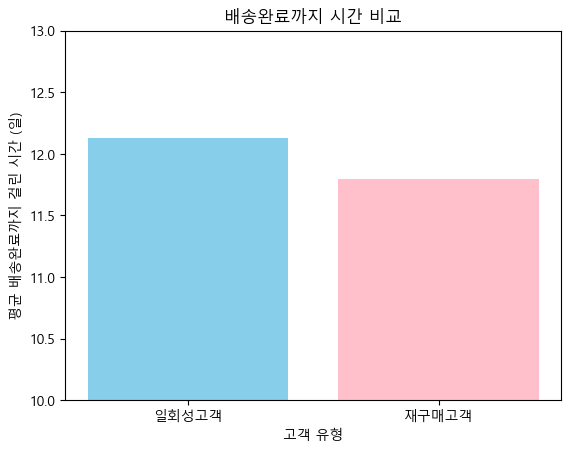

In [40]:
# 바차트로 비교
plt.bar(['일회성고객', '재구매고객'], [no_mean, re_mean], color=['skyblue', 'pink'])
plt.title('배송완료까지 시간 비교')
plt.ylim(10, 13)
plt.xlabel('고객 유형')
plt.ylabel('평균 배송완료까지 걸린 시간 (일)')
plt.show()

### 주별 배송비, 배송 시간 

In [44]:
check_no = pd.merge(check_no, df_order_items, on = 'order_id', how = 'left')
check_re = pd.merge(check_re, df_order_items, on = 'order_id', how = 'left')

In [45]:
check_no = pd.merge(check_no, df_sellers, on = 'seller_id', how = 'left')
check_re = pd.merge(check_re, df_sellers, on = 'seller_id', how = 'left')

In [47]:
check_no.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110285 entries, 0 to 110284
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    110285 non-null  int64         
 1   customer_unique_id             110285 non-null  int64         
 2   customer_zip_code_prefix       110285 non-null  int64         
 3   customer_city                  110285 non-null  object        
 4   customer_state                 110285 non-null  object        
 5   order_count                    110285 non-null  int64         
 6   customer_type                  110285 non-null  object        
 7   order_id                       110285 non-null  int64         
 8   order_status                   110285 non-null  object        
 9   order_purchase_timestamp       110285 non-null  datetime64[ns]
 10  order_approved_at              110181 non-null  datetime64[ns]
 11  

In [50]:
check_no['to_state'] = check_no['seller_state'] + '▶' + check_no['customer_state']
check_re['to_state'] = check_re['seller_state'] + '▶' + check_re['customer_state']

In [54]:
check_no['to_state'].value_counts()

to_state
SP▶SP    35031
SP▶RJ     9481
SP▶MG     8410
SP▶RS     4049
SP▶PR     3590
         ...  
PI▶PI        1
PE▶MT        1
AM▶MA        1
SE▶PA        1
PB▶SE        1
Name: count, Length: 415, dtype: int64

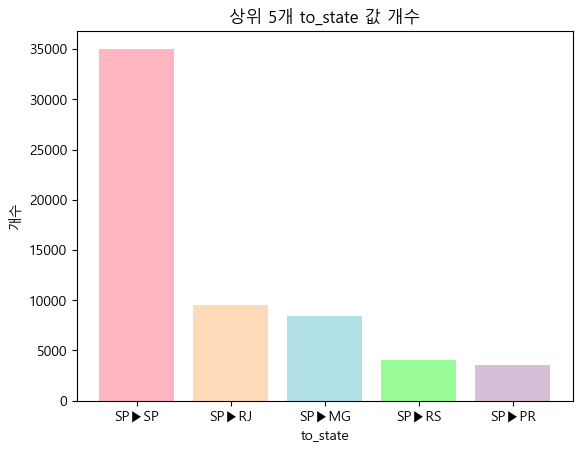

In [56]:
# to_state 값 개수 구하기
to_state_counts = check_no['to_state'].value_counts().head()

# 바차트로 나타내기
colors = ['#FFB6C1', '#FFDAB9', '#B0E0E6', '#98FB98', '#D8BFD8']
plt.bar(to_state_counts.index, to_state_counts.values, color=colors)
plt.title('상위 5개 to_state 값 개수')
plt.xlabel('to_state')
plt.ylabel('개수')
plt.show()

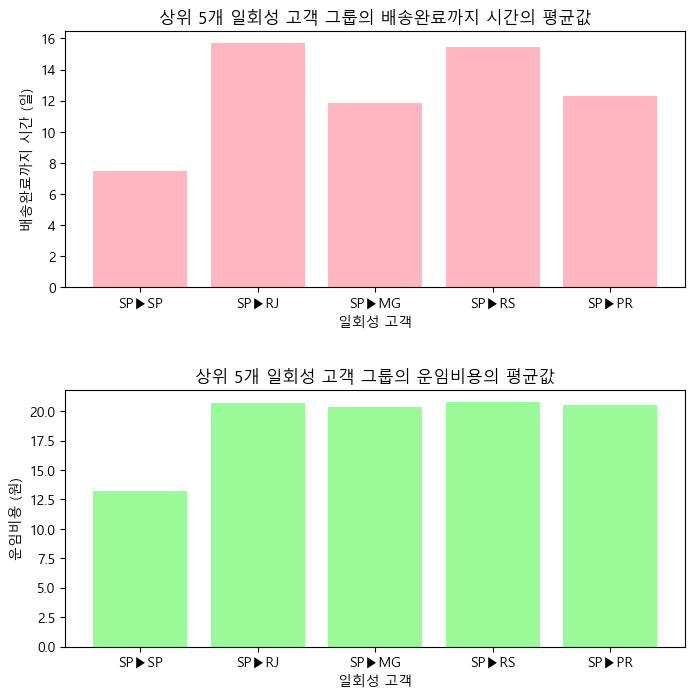

In [63]:
# to_state 칼럼별로 그룹화한 후, time_diff와 freight_value의 평균값 구하기
grouped_no = check_no.groupby('to_state')[['time_diff','freight_value']].mean()

# to_state 값 개수 구하기
to_state_counts = check_no['to_state'].value_counts().head()

# 필터링한 상위 5개 to_state 값에 해당하는 데이터 추출하기
top_5 = grouped_no.loc[to_state_counts.index]

# 두 개의 서브플롯 생성하기
fig, ax = plt.subplots(2, 1, figsize=(8, 8))

# 첫 번째 서브플롯에 배송완료까지 시간 그래프 그리기
ax[0].bar(top_5.index, top_5['time_diff'], color='#FFB6C1')
ax[0].set_title('상위 5개 일회성 고객 그룹의 배송완료까지 시간의 평균값')
ax[0].set_xlabel('일회성 고객')
ax[0].set_ylabel('배송완료까지 시간 (일)')

# 두 번째 서브플롯에 운임비용 그래프 그리기
ax[1].bar(top_5.index, top_5['freight_value'], color='#98FB98')
ax[1].set_title('상위 5개 일회성 고객 그룹의 운임비용의 평균값')
ax[1].set_xlabel('일회성 고객')
ax[1].set_ylabel('운임비용 (원)')

# 서브플롯 간 간격 조정하기
plt.subplots_adjust(hspace=0.4)

# 그래프 보여주기
plt.show()

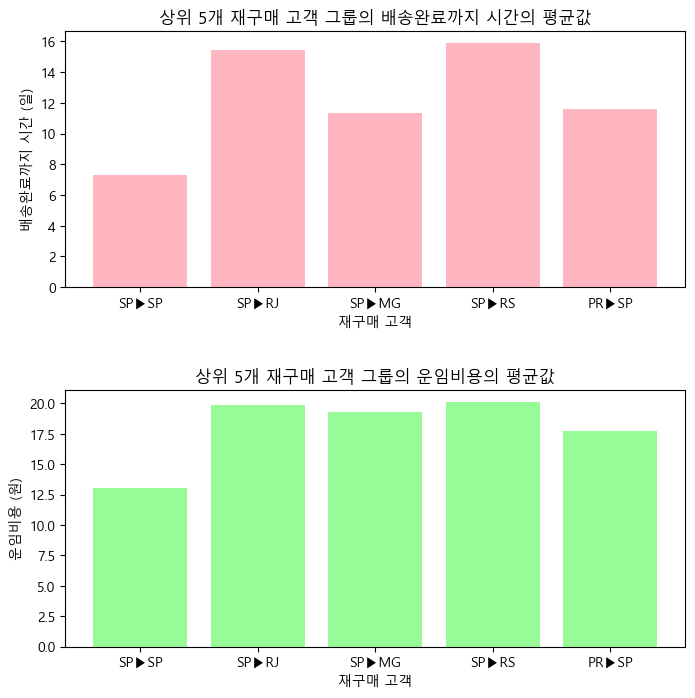

In [64]:
# to_state 칼럼별로 그룹화한 후, time_diff와 freight_value의 평균값 구하기
grouped_re = check_re.groupby('to_state')[['time_diff','freight_value']].mean()

# to_state 값 개수 구하기
to_state_counts = check_re['to_state'].value_counts().head()

# 필터링한 상위 5개 to_state 값에 해당하는 데이터 추출하기
top_5 = grouped_re.loc[to_state_counts.index]

# 두 개의 서브플롯 생성하기
fig, ax = plt.subplots(2, 1, figsize=(8, 8))

# 첫 번째 서브플롯에 배송완료까지 시간 그래프 그리기
ax[0].bar(top_5.index, top_5['time_diff'], color='#FFB6C1')
ax[0].set_title('상위 5개 재구매 고객 그룹의 배송완료까지 시간의 평균값')
ax[0].set_xlabel('재구매 고객')
ax[0].set_ylabel('배송완료까지 시간 (일)')

# 두 번째 서브플롯에 운임비용 그래프 그리기
ax[1].bar(top_5.index, top_5['freight_value'], color='#98FB98')
ax[1].set_title('상위 5개 재구매 고객 그룹의 운임비용의 평균값')
ax[1].set_xlabel('재구매 고객')
ax[1].set_ylabel('운임비용 (원)')

# 서브플롯 간 간격 조정하기
plt.subplots_adjust(hspace=0.4)

# 그래프 보여주기
plt.show()

In [66]:
pd.set_option('display.max_columns',None)

### 카테고리별 배송시간

In [67]:
check_re

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_count,customer_type,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,time_diff,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total,seller_zip_code_prefix,seller_city,seller_state,to_state
0,1911,35886,89254,jaragua do sul,SC,2,1,72972,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,2017-09-28 17:32:43,2017-10-04,1,debit_card,1,282.21,13.0,1.0,17868.0,2434.0,2017-09-20 18:25:11,259.90,22.31,282.21,5141.0,pirituba,SP,SP▶SC
1,87023,93995,81560,curitiba,PR,2,1,12263,delivered,2018-01-18 12:35:44,2018-01-18 12:56:32,2018-01-18 23:25:35,2018-01-26 15:17:57,2018-02-20,1,debit_card,1,39.10,8.0,1.0,32491.0,2137.0,2018-01-30 12:56:32,25.00,14.10,39.10,21210.0,rio de janeiro,RJ,RJ▶PR
2,22828,35246,5704,sao paulo,SP,2,1,60892,delivered,2018-03-07 15:57:14,2018-03-07 16:15:30,2018-03-12 23:02:49,2018-03-15 00:46:30,2018-03-19,1,credit_card,3,36.39,7.0,1.0,32118.0,1048.0,2018-03-13 16:15:30,27.99,8.40,36.39,4160.0,sao paulo,SP,SP▶SP
3,48351,12200,42800,camacari,BA,2,1,33721,delivered,2018-04-18 09:42:53,2018-04-18 09:55:17,2018-04-20 18:52:39,2018-05-17 20:19:49,2018-05-18,1,credit_card,1,67.05,29.0,1.0,20440.0,2086.0,2018-04-24 09:55:17,44.99,22.06,67.05,13481.0,limeira,SP,SP▶BA
4,94156,23164,27525,resende,RJ,2,1,27255,delivered,2017-06-14 18:31:54,2017-06-15 18:43:04,2017-06-22 08:11:38,2017-07-07 20:32:47,2017-07-07,1,credit_card,8,134.25,23.0,1.0,6912.0,1812.0,2017-06-21 18:43:04,56.99,16.13,73.12,14940.0,ibitinga,SP,SP▶RJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8144,28315,59552,9530,sao caetano do sul,SP,2,1,12638,delivered,2018-06-20 14:16:20,2018-06-20 14:38:41,2018-06-20 15:02:00,2018-06-27 13:18:47,2018-07-18,1,credit_card,1,126.57,6.0,1.0,8633.0,239.0,2018-06-26 14:32:11,26.90,15.29,42.19,88085.0,florianopolis,SC,SC▶SP
8145,28315,59552,9530,sao caetano do sul,SP,2,1,12638,delivered,2018-06-20 14:16:20,2018-06-20 14:38:41,2018-06-20 15:02:00,2018-06-27 13:18:47,2018-07-18,1,credit_card,1,126.57,6.0,2.0,8633.0,239.0,2018-06-26 14:32:11,26.90,15.29,42.19,88085.0,florianopolis,SC,SC▶SP
8146,28315,59552,9530,sao caetano do sul,SP,2,1,12638,delivered,2018-06-20 14:16:20,2018-06-20 14:38:41,2018-06-20 15:02:00,2018-06-27 13:18:47,2018-07-18,1,credit_card,1,126.57,6.0,3.0,8633.0,239.0,2018-06-26 14:32:11,26.90,15.29,42.19,88085.0,florianopolis,SC,SC▶SP
8147,35480,78884,29134,viana,ES,2,1,49164,delivered,2018-05-15 10:39:41,2018-05-15 14:30:29,2018-05-15 15:55:00,2018-05-22 19:42:12,2018-06-12,1,debit_card,1,80.37,7.0,1.0,3871.0,932.0,2018-05-18 14:14:45,59.90,20.47,80.37,80310.0,curitiba,PR,PR▶ES


In [68]:
df_products

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,16234,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,6621,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,22240,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,18578,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,14617,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,28216,furniture_decor,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,20353,construction_tools_lights,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,3826,bed_bath_table,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,29140,computers_accessories,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [71]:
df_category = pd.merge(df_order,df_order_items, on='order_id', how='left')

In [72]:
df_category = pd.merge(df_category,df_products, on='product_id', how='left')

In [74]:
df_category['time_diff'] = (df_category['order_delivered_customer_date'] - df_category['order_purchase_timestamp']).dt.days

In [75]:
df_category

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,time_diff
0,13974,65773,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,19486.0,2940.0,2017-10-06 11:07:15,29.99,8.72,38.71,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,8.0
1,83165,13301,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,16644.0,3268.0,2018-07-30 03:24:27,118.70,22.76,141.46,perfumery,29.0,178.0,1.0,400.0,19.0,13.0,19.0,13.0
2,66104,44559,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,28208.0,1712.0,2018-08-13 08:55:23,159.90,19.22,179.12,auto,46.0,232.0,1.0,420.0,24.0,19.0,21.0,9.0
3,64037,69256,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,27380.0,91.0,2017-11-23 19:45:59,45.00,27.20,72.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,13.0
4,14183,35294,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,31317.0,3165.0,2018-02-19 20:31:37,19.90,8.72,28.62,stationery,38.0,316.0,4.0,250.0,51.0,15.0,15.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,85704,30689,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1.0,8698.0,1444.0,2018-02-12 13:10:37,174.90,20.10,195.00,baby,52.0,828.0,4.0,4950.0,40.0,10.0,40.0,22.0
113421,19817,23177,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1.0,7151.0,2752.0,2017-09-05 15:04:16,205.99,65.02,271.01,home_appliances_2,51.0,500.0,2.0,13300.0,32.0,90.0,22.0,24.0
113422,6896,84231,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1.0,26886.0,3522.0,2018-01-12 21:36:21,179.99,40.59,220.58,computers_accessories,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,17.0
113423,6896,84231,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2.0,26886.0,3522.0,2018-01-12 21:36:21,179.99,40.59,220.58,computers_accessories,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,17.0


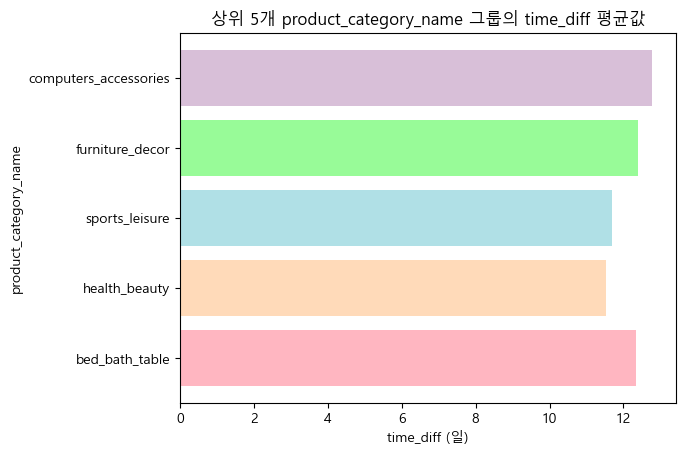

In [78]:
# product_category_name 칼럼별로 그룹화한 후, time_diff의 평균값 구하기
grouped = df_category.groupby('product_category_name')['time_diff'].mean()

# 개수가 많은 상위 5개 그룹 추출하기
cnt_category = df_category['product_category_name'].value_counts().head()

# 필터링한 상위 5개 to_state 값에 해당하는 데이터 추출하기
top_5 = grouped.loc[cnt_category.index]


# 바차트로 나타내기
colors = ['#FFB6C1', '#FFDAB9', '#B0E0E6', '#98FB98', '#D8BFD8']
plt.barh(top_5.index, top_5.values, color=colors)
plt.title('상위 5개 product_category_name 그룹의 time_diff 평균값')
plt.xlabel('time_diff (일)')
plt.ylabel('product_category_name')
plt.show()

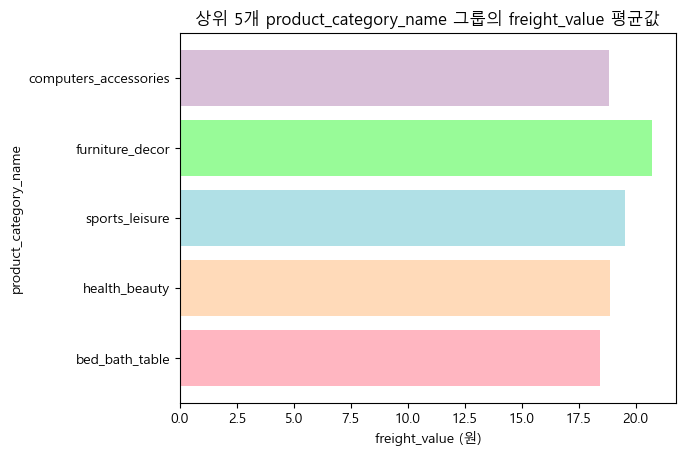

In [79]:
# product_category_name 칼럼별로 그룹화한 후, freight_value의 평균값 구하기
grouped = df_category.groupby('product_category_name')['freight_value'].mean()

# 개수가 많은 상위 5개 그룹 추출하기
cnt_category = df_category['product_category_name'].value_counts().head()

# 필터링한 상위 5개 to_state 값에 해당하는 데이터 추출하기
top_5 = grouped.loc[cnt_category.index]


# 바차트로 나타내기
colors = ['#FFB6C1', '#FFDAB9', '#B0E0E6', '#98FB98', '#D8BFD8']
plt.barh(top_5.index, top_5.values, color=colors)
plt.title('상위 5개 product_category_name 그룹의 freight_value 평균값')
plt.xlabel('freight_value (원)')
plt.ylabel('product_category_name')
plt.show()

### 재구매율이 높은 제품의 카테고리 비율

In [84]:
# product_id별로 order_id의 개수 카운트하기
counts = df_category.groupby('product_id')['order_id'].count().reset_index()

# df_category 데이터프레임과 합치기
merged = pd.merge(df_category, counts, on='product_id')

# product_category_name 칼럼별로 그룹화한 후, 전체 개수 대비 2이상인 비율 구하기
result = merged.groupby('product_category_name').apply(lambda x: (x['order_id_y'] >= 2).sum() / len(x)).sort_values(ascending=False).head()

print(result)

product_category_name
cds_dvds_musicals         1.000000
tablets_printing_image    0.975904
computers                 0.950739
food                      0.931373
office_furniture          0.923714
dtype: float64


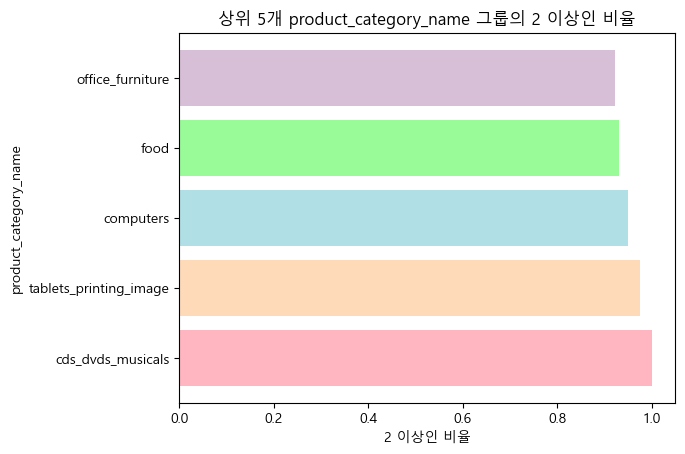

In [85]:
# 바차트로 나타내기
colors = ['#FFB6C1', '#FFDAB9', '#B0E0E6', '#98FB98', '#D8BFD8']
plt.barh(result.index, result.values, color=colors)
plt.title('상위 5개 product_category_name 그룹의 2 이상인 비율')
plt.xlabel('2 이상인 비율')
plt.ylabel('product_category_name')
plt.show()